# Imports

In [138]:
# to prevent to restart kernel when any changes are made to any imported file
%reload_ext autoreload
%autoreload 2

# to import any file from some other directory
# sys.path.append("/tmp/fastai/old")

# to stop printing warnings
import warnings
warnings.filterwarnings('ignore')
def warn(*args, **kwargs):
    pass
warnings.warn = warn
    
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_colwidth', 10000)

# to increase cells width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import matplotlib.pyplot as plt

# DATA

In [116]:
data=pd.read_csv('/Users/muhammadfaisal/Documents/jobs/visable/task/sample_data_for_task1.csv')
print(data.shape)

data.head()

(37295, 2)


,text,label
0,zucker fabrik,ft
1,Lebensmittel kommssionierung,ft
2,geländer biegen,mr
3,gebäudeausrüstung technische,ct
4,kürbiskernöl softgels,ft


### labels-distribution

In [117]:
data.label.value_counts()

label
ft     11226
pkg     9617
ct      5061
mr      5016
ch      3688
cnc     2587
Name: count, dtype: int64

<Axes: xlabel='label'>

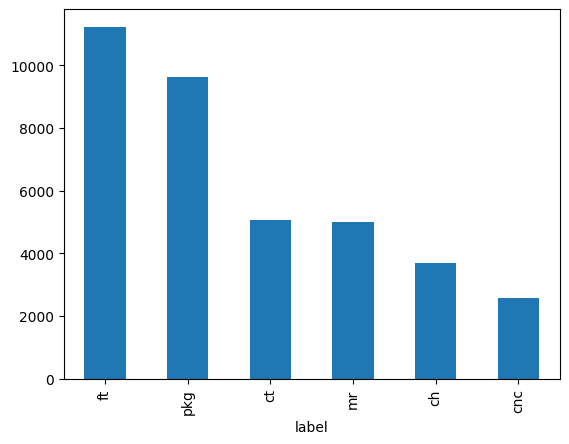

In [140]:

data.label.value_counts().plot(kind='bar')

In [118]:
data.label.value_counts(normalize=True)


label
ft     0.301815
pkg    0.258556
ct     0.136067
mr     0.134857
ch     0.099153
cnc    0.069552
Name: proportion, dtype: float64

### text-repeatition

In [119]:
print(f'{round(data.text.nunique()/data.shape[0],2)*100}% text is unique')

95.0% text is unique


### empty-labels

In [120]:
data.label.isnull().sum()


100

In [142]:
data[data.text==' '].shape

(300, 2)

In [ ]:
37295

### max-text-length

In [121]:
data.text.str.len().max()


798

### text-labels overlap


In [122]:
data.text.value_counts().to_frame().sample(100)

,count
text,
protein knusp,1
Lebensmittel kaffe,1
Olivenöl Marokko,1
cnc fertigung stefan,1
Lohnabfüllung molkedrink,1
gerüstbau service,1
pasteten wurst,1
installation kälte,1
metallbau möbel,1


# CLEANING

In [123]:
df=data.copy()

In [124]:
# dropping the 'text' column with empty values i.e. " "
df=df[df.text!=' ']

# dropping the 'label' column with empty values
df=df[df.label.notnull()]

# clean text
df['text']=(df.text.str.replace('"','')
           .str.replace('-\t','')
           .str.replace('+',''))

# MODEL

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import fasttext


### data-prep

In [126]:

df['label_ft'] = '__label__'+df['label']

df['text_ft']=df.label_ft+ ' ' +df.text


In [127]:
df.label_ft.value_counts()

label_ft
__label__ft     11176
__label__pkg     9567
__label__ct      5011
__label__mr      4966
__label__ch      3638
__label__cnc     2537
Name: count, dtype: int64

In [128]:
df[['text_ft']].head()

,text_ft
0,__label__ft zucker fabrik
1,__label__ft Lebensmittel kommssionierung
2,__label__mr geländer biegen
3,__label__ct gebäudeausrüstung technische
4,__label__ft kürbiskernöl softgels


### training

In [129]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df.label_ft)
train.shape, test.shape

((25826, 4), (11069, 4))

In [130]:
train.text_ft.to_csv('fasttext_train.train', index=False, header=False)
test.text_ft.to_csv('fasttext_test.test', index=False, header=False)


In [131]:
model = fasttext.train_supervised(input="fasttext_train.train")

model.save_model("model.bin")


Read 0M words
Number of words:  20175
Number of labels: 6
Progress: 100.0% words/sec/thread:  804925 lr:  0.000000 avg.loss:  0.377915 ETA:   0h 0m 0s


In [132]:
model.test("fasttext_test.test", k=1)

(10903, 0.8766394570301752, 0.8766394570301752)

### single-prediction

In [133]:
pred=model.predict("hello", k=1)
conf=pred[1][0]
label=pred[0][0].replace('__label__', '')

label, conf

('ft', 0.8498812317848206)

### multi-prediction

In [134]:
# Load your trained FastText model
model = fasttext.load_model('model.bin')

# Assuming test_df is your test DataFrame with 'text' and 'label' columns
test_texts = test['text'].tolist()
true_labels = test['label'].tolist()

# Make predictions using the FastText model
predicted_labels = [model.predict(text)[0][0].replace('__label__', '') for text in test_texts]

# Get unique labels
all_labels = sorted(set(true_labels + predicted_labels))

# Generate confusion matrix with labels
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=all_labels)

# Create a DataFrame with labeled rows and columns
conf_matrix = pd.DataFrame(conf_matrix, index=all_labels, columns=all_labels)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels)




In [135]:
# Print or use the results as needed
print("\nClassification Report:\n")

print(class_report)




Classification Report:

              precision    recall  f1-score   support

          ch       0.95      0.83      0.88      1092
         cnc       0.87      0.73      0.79       761
          ct       0.95      0.86      0.90      1503
          ft       0.84      0.94      0.88      3353
          mr       0.88      0.82      0.85      1490
         pkg       0.86      0.89      0.88      2870

    accuracy                           0.87     11069
   macro avg       0.89      0.84      0.86     11069
weighted avg       0.88      0.87      0.87     11069



In [136]:
print("Confusion Matrix:\n")

conf_matrix


Confusion Matrix:



,ch,cnc,ct,ft,mr,pkg
ch,902,4,5,126,8,47
cnc,3,553,9,69,73,54
ct,4,6,1292,102,45,54
ft,20,16,11,3138,8,160
mr,1,52,36,85,1222,94
pkg,18,7,14,229,36,2566


# Testing

In [30]:
import requests

In [46]:

url = 'http://127.0.0.1:8000/classify/'
# url='http://0.0.0.0:80/classify'

In [47]:
def test(text, url):
    x = requests.post(url, json = {'text': text})
    return x.text

### correct-output

In [58]:
test('zucker fabrik', url)

'{"label":"ft","conf":1.0}'

### low-confidence

In [49]:
test('helloworld', url)

'{"label":"undefined","conf":0.82}'

### invalid-data-type

In [50]:
test(5, url)


'{"detail":[{"type":"string_type","loc":["body","text"],"msg":"Input should be a valid string","input":5,"url":"https://errors.pydantic.dev/2.6/v/string_type"}]}'

### input-too-long

In [56]:
test('z'*2048, url)


'{"detail":[{"type":"string_too_long","loc":["body","text"],"msg":"String should have at most 1024 characters","input":"zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

### input-too-short

In [57]:
test('z', url)


'{"detail":[{"type":"string_too_short","loc":["body","text"],"msg":"String should have at least 2 characters","input":"z","ctx":{"min_length":2},"url":"https://errors.pydantic.dev/2.6/v/string_too_short"}]}'

In [103]:
from pypdf import PdfReader
output='/Users/muhammadfaisal/Documents/jobs/visable/task/images'
reader = PdfReader("/Users/muhammadfaisal/Documents/jobs/visable/task/product_catalogue_for_task2.pdf")
for page in reader.pages:
    for image in page.images:
        with open(f"{output}/{image.name}", "wb") as fp:
            fp.write(image.data)

In [110]:

print(reader.pages[6].extract_text())

Druckdicht bis 150 bar für den Einbau in Hydraulik-/ Pneumatikzylinder
 ■Ausführung Stößel / Federtastmechanik 
 ■Linearität bis 0,10 % 
 ■Messbereiche 2...200 mmDruckdicht bis 150 bar für den Einbau in Hydraulik-/ Pneumatikzylinder  
und Ventile
 ■kompakte Bauform 
 ■Ausführung Stößel / Federtastmechanik
 ■Linearität bis 0,10 % 
 ■Messbereiche 2...10 mm ■F18 SERIE  ■F14 SERIE
  PRODUKTÜBERSICHT  |  INDUKTIVE SENSOREN − LVDT   7 
 ■IMCA - LVDT EXTERNELEKTRONIK  ■KAB - LVDT KABELELEKTRONIK
Integriert ins Sensorkabel
 ■konfigurierbares Ausgangssignal 0…10 V, 0…5 V, ±5 V, ±10 V, 4…20 mA, 
0…20 mA
 ■sehr geringes Restrauschen
 ■integrierte Kabelbrucherkennung
 ■bis Schutzklasse IP68 Externelektronik für Schaltschrankeinbau
 ■konfigurierbares Ausgangssignal 0…10 V, 0…5 V, ±5 V, ±10 V, 4…20 mA, 
0…20 mA
 ■DIN-Schienen-Montage
 ■integrierte Kabelbrucherkennung mit Alarmausgang
 ■EDDYMOTION LVDT STANDARD
 Softwaretool für TX LVDT
 ■Analyse und Dokumentation mechanischer Bewegungen
 ■Funktionsu